In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/claim.sample.csv',index_col=None)

/Users/raghuramsrinivas/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
"""
for colName in df.columns :
    
    print "Column : "+colName
    print df[colName].unique()
    print 'Size %d' % len(df[colName].unique())
    print "\n\n"
"""

## Questions 1
1. J-codes are procedure codes that start with the letter 'J'. Extract all claim lines that have a J-code to complete the following exercises. <br>

     A. Find the number of claim lines that have J-codes.
     
     B. How much was paid for J-codes to providers for 'in network' claims?
     
     C. What are the top five J-codes based on the payment to providers?

#### A. Find the number of claim lines that have J-codes.

In [3]:
## Extract  J procedure codes
dfJCodes = df[df['Procedure.Code'].str.startswith('J')]

In [4]:
dfJCodes.head(3)

,Unnamed: 0,Claim.Number,Claim.Line.Number,Member.ID,Provider.ID,Line.Of.Business.ID,Revenue.Code,Service.Code,Place.Of.Service.Code,Procedure.Code,...,Provider.Payment.Amount,Group.Index,Subscriber.Index,Subgroup.Index,Claim.Type,Claim.Subscriber.Type,Claim.Pre.Prince.Index,Claim.Current.Status,Network.ID,Agreement.ID
3073,3074,74645490.0,10,1992052,FA0001389001,0005,0636,OP7O,,J1650,...,0.0,114,1613650,0,M,H,S,91,P00000000001,FH001309QB01
3091,3092,18860690.0,8,22808129,FA0001389001,0001,0636,OP7O,,J2405,...,0.0,275,18475600,483,M,H,,2,H00000000001,FH001886QH01
3092,3093,18860690.0,9,22808129,FA0001389001,0001,0636,OP7O,,J7030,...,0.0,275,18475600,483,M,H,,2,H00000000001,FH001886QH01


In [5]:
print "1.A. Find the number of claim lines that have J-codes."
print "The number of claim lines with J Procedure codes : %d"% dfJCodes.shape[0]

1.A. Find the number of claim lines that have J-codes.
The number of claim lines with J Procedure codes : 51029


##### Based on the analysis above 

The number of claim lines with J Procedure codes : 51029

In [6]:
"""
for colName in dfJCodes.columns :
    print "Column : "+colName +': Size %d' % len(dfJCodes[colName].unique()) +""
"""

'\nfor colName in dfJCodes.columns :\n    print "Column : "+colName +\': Size %d\' % len(dfJCodes[colName].unique()) +""\n'

#### B. How much was paid for J-codes to providers for 'in network' claims?"

###### The In Network / Out network claims is indicated as I as In Network , O or ' ' as Out Of Network

In [7]:
def setInOutFlag(x):
    x = x.strip()
    if len(x) > 0 :
        return x
    return 'O'

In [8]:
print "Values in the In/Out Network claims : %s" % dfJCodes['In.Out.Of.Network'].unique()

print "Payments disbursed by In/Out network claim : \n%s" % dfJCodes['Provider.Payment.Amount'].groupby(dfJCodes['In.Out.Of.Network']).sum()

Values in the In/Out Network claims : ['I' ' ' 'O']
Payments disbursed by In/Out network claim : 
In.Out.Of.Network
     0.000000e+00
I    2.417221e+06
O    1.208613e+03
Name: Provider.Payment.Amount, dtype: float64


The In.Out.Of.Network column contains entries with a value = ' ' . However no claims have been paid for this value. This will hence be interpreted as Out of network

In [9]:
dfJCodes['In.Out.Of.Network'] = dfJCodes['In.Out.Of.Network'].apply(lambda x : setInOutFlag(x))

/Users/raghuramsrinivas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [10]:
print "Payments disbursed by In/Out network claim : \n%s" % dfJCodes['Provider.Payment.Amount'].groupby(dfJCodes['In.Out.Of.Network']).sum()

Payments disbursed by In/Out network claim : 
In.Out.Of.Network
I    2.417221e+06
O    1.208613e+03
Name: Provider.Payment.Amount, dtype: float64


###### Based on analysis above 

Total Claims disbursed for In Network claims = $ 2,417,221

Total Claims disbursed for Out of Network claims = $ 1,208.61

#####     C. What are the top five J-codes based on the payment to providers?

In [11]:
PaymentsByJCodes = dfJCodes.groupby(dfJCodes['Procedure.Code']).sum()

In [12]:
PaymentsByJCodes.to_csv("data/PaymentsByJCodes.csv")
PaymentsByJCodes = pd.read_csv("data/PaymentsByJCodes.csv")

In [13]:
PaymentsByJCodes.head(3)

,Procedure.Code,Unnamed: 0,Claim.Number,Claim.Line.Number,Member.ID,Claim.Charge.Amount,Subscriber.Payment.Amount,Provider.Payment.Amount,Group.Index,Subscriber.Index,Subgroup.Index,Claim.Current.Status
0,J0130,241514,5.240329e+08,31,39086060,6707.594025,0.0,0.000000,572,31661450,0,2
1,J0131,106194058,3.059257e+11,5650,18706322573,209024.898060,0.0,12508.373730,5660520,15152954600,3081401,8781
2,J0133,1393932,2.601180e+09,66,191819943,1057.657875,0.0,137.560335,69840,155382700,73578,245


In [14]:
PaymentsByJCodes['Provider.Payment.Amount'].sum()

2418429.57165

In [15]:
listProcedureCodes = PaymentsByJCodes['Procedure.Code']
listProviderPayments = PaymentsByJCodes['Provider.Payment.Amount']
listProviderPayments = listProviderPayments/2418429.57165

In [18]:
from IPython.display import Image

import plotly.plotly as py
import plotly.graph_objs as go

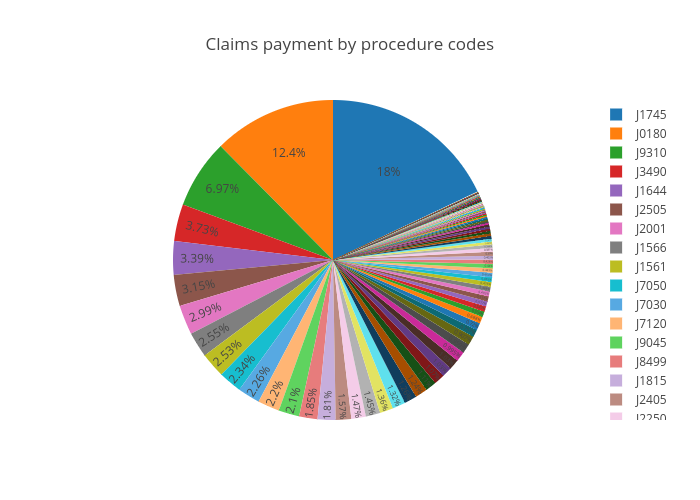

In [19]:
labels = listProcedureCodes
values = listProviderPayments

trace = go.Pie(labels=labels, values=values, textposition ='inside')
##, "textposition":"inside"
data = [trace]
layout = dict(title = 'Claims payment by procedure codes')
fig = dict(data=data, layout=layout )

# Plot and embed in ipython notebook!
py.image.save_as(fig, filename='plots/payments by procedure code.png')

Image('plots/payments by procedure code.png')

##### From the analysis above  we see that the following are the top 5 J procedure codes with approved claims :
J1745  <br>
J0180  <br>
J9310 <br>
J3490  <br>
J1644  <br>


In [20]:
import warnings
warnings.filterwarnings('ignore')

#### Question 2
2. For the following exercises, determine the number of providers that were paid for at least one J-code. Use the J-code claim lines for these providers to complete the following exercises.

     A. Create a scatter plot that displays the number of paid zero or zero payment claims for each provider versus the number of paid claims.
     
     B. What insights can you suggest from the graph?
     
     C. Based on the graph, is the behavior of any of the providers concerning? Explain.
 

#### For thie question , we will first create a variable by name PaymentDeclined to flag approved/declined claims

In [21]:
def isDeclined(x) :
    if x==0:
        return 1
    return 0
dfJCodes['PaymentDeclined'] = dfJCodes['Provider.Payment.Amount']
dfJCodes['PaymentDeclined'] = dfJCodes['PaymentDeclined'].apply(lambda x : isDeclined(x))

#### We will first examine how many claims have been approved v/s declined

In [22]:
##Check how many total payments are Paid v/s Declined
dfJCodes.groupby(dfJCodes.PaymentDeclined).count()['Claim.Line.Number']

PaymentDeclined
0     6068
1    44961
Name: Claim.Line.Number, dtype: int64

In [23]:
import plotly.plotly as py
import plotly.graph_objs as go

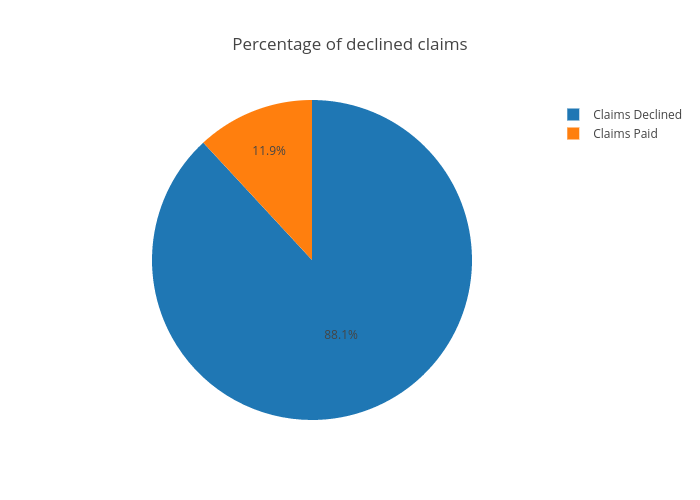

In [24]:
TotalPaid = dfJCodes.groupby(dfJCodes.PaymentDeclined).count()['Claim.Line.Number'][0]
TotalDeclined = dfJCodes.groupby(dfJCodes.PaymentDeclined).count()['Claim.Line.Number'][1]

labels = ['Claims Paid', 'Claims Declined']
values = [TotalPaid,TotalDeclined]

trace = go.Pie(labels=labels, values=values , textposition ='inside')

data = [trace]
layout = dict(title = 'Percentage of declined claims')
fig = dict(data=data, layout=layout)

# Plot and embed in ipython notebook!
py.image.save_as(fig, filename='plots/pie-chart-decline counts.png')

from IPython.display import Image
Image('plots/pie-chart-decline counts.png')


##### Observation : Close to 88% of claim lines with 'J' procedure codes are declined

In [25]:
listColNames = ['Provider.ID','Line.Of.Business.ID' ,'Revenue.Code' ,'Service.Code' ,'Place.Of.Service.Code' ,'Procedure.Code','Diagnosis.Code' ,
'Price.Index' ,'In.Out.Of.Network' ,'Reference.Index' ,'Pricing.Index' ,'Capitation.Index' ,'Group.Index' ,
'Subscriber.Index' ,'Subgroup.Index' ,'Claim.Type' ,'Claim.Subscriber.Type' ,'Claim.Pre.Prince.Index' ,'Claim.Line.Number']

In [26]:
import numpy as np
from IPython.display import Image
from IPython.core.display import display, HTML


#### Generation of Prior probabilities : 
Most of the features in the dataset are catagorical . Hence we will generate prior probabilities for the columns in the data set

In [ ]:
### RUN THIS ONLY ONCE. Data and Plots saved under data/ and plots/
for colName in listColNames :
    
    ##print "**********************************************************************************************************"
    print "Generating Prior probabilities for  "+colName
    #colName = 'Diagnosis.Code'

    
    dfTemp  = dfJCodes.groupby([dfJCodes[colName],dfJCodes['PaymentDeclined']]).count()
    dfTemp.to_csv("data/"+colName+".csv")
    dfTemp = pd.read_csv("data/"+colName+".csv")
    dfTemp = dfTemp[dfTemp.PaymentDeclined==1]
    
    listClaims = dfTemp['Claim.Line.Number']
    
    listClaims = listClaims / TotalDeclined
    
    #print "Column Name : %s" %colName
    #print "Total Records : %.2f" %len(dfTemp[colName].unique())
    #print "Sum of Records : %.2f" %sum(listClaims)
    #print "Max Value : %.2f" % max(listClaims)
    

        
    labels = dfTemp[colName]
    values = listClaims

    
    if len(dfTemp[colName].unique()) > 1000 :
        print "skipping "+colName
        continue
        
        
    trace = go.Pie(labels=labels, values=values , textposition ='inside')
    data = [trace]
    layout = dict(title = 'Percentage of declined claims per '+colName)
    fig = dict(data=data, layout=layout)

    # Plot and embed in ipython notebook!
    py.image.save_as(fig, filename="plots/pie-chart-decline counts "+colName.replace('.','')+".png")
    #display(HTML("<img src='plots/pie-chart-decline counts "+colName.replace('.','')+".png' >"))
    

    

#### Analysis of priors on Provider ID

Next , we will analyze the claim payments by provider 

In [27]:
dfProviders = pd.read_csv('data/Provider.ID.csv')

In [28]:
dfProviders.head(4)

,Provider.ID,PaymentDeclined,Unnamed: 0,Claim.Number,Claim.Line.Number,Member.ID,Line.Of.Business.ID,Revenue.Code,Service.Code,Place.Of.Service.Code,...,Provider.Payment.Amount,Group.Index,Subscriber.Index,Subgroup.Index,Claim.Type,Claim.Subscriber.Type,Claim.Pre.Prince.Index,Claim.Current.Status,Network.ID,Agreement.ID
0,FA0001387001,0,74,74,74,74,74,74,74,74,...,74,74,74,74,74,74,74,74,74,74
1,FA0001387001,1,8710,67,8710,8710,8710,8710,8710,8710,...,8710,8710,8710,8710,8710,8710,8710,8710,8710,8710
2,FA0001387002,0,1786,1786,1786,1786,1786,1786,1786,1786,...,1786,1786,1786,1786,1786,1786,1786,1786,1786,1786
3,FA0001387002,1,9799,9799,9799,9799,9799,9799,9799,9799,...,9799,9799,9799,9799,9799,9799,9799,9799,9799,9799


In [32]:
listProviders = []

for providerId in dfProviders['Provider.ID'].unique():
    
    dictProvider = {}
    NumNonPaid = dfProviders[(dfProviders['Provider.ID']== providerId) & (dfProviders['PaymentDeclined']==1) ]['Claim.Line.Number']

    numPaid = dfProviders[(dfProviders['Provider.ID']== providerId) & (dfProviders['PaymentDeclined']==0) ]['Claim.Line.Number']
    
    intNotPaid = 0
    intPaid = 0
    if len(numPaid)==0:
        intPaid  = 0 
    else :
        intPaid = numPaid.unique()[0]
    
    if len(numNotPaid)==0:
        intNotPaid  = 0 
    else :
        intNotPaid = NumNonPaid.unique()[0]
    
        
    dictProvider['NumPaid']  = intPaid
    
    dictProvider['NumNonPaid'] = intNotPaid
    
    dictProvider['ProviderID']  = providerId
    
    listProviders.append(dictProvider)
    
dfProviderClaims = pd.DataFrame(listProviders)


In [34]:
dfProviderClaims.head(3)

,NumNonPaid,NumPaid,ProviderID
0,8710,74,FA0001387001
1,9799,1786,FA0001387002
2,13947,895,FA0001389001


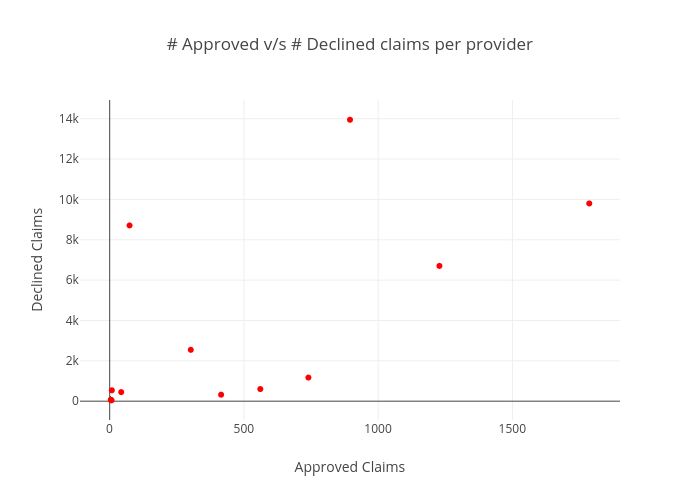

In [35]:
import plotly.plotly as py
import plotly.graph_objs as go

# Create random data with numpy
import numpy as np

dfProviderClaims = dfProviderClaims[dfProviderClaims.NumPaid > 0]
data = []

trace0 = go.Scatter(
                y = (list(dfProviderClaims.NumNonPaid)),
                x = (list(dfProviderClaims.NumPaid)),
                mode = 'markers' , marker = dict(symbol="103" , color ="red") ,
                name ='Collaborative Filtering'
                )
    

    
data = [trace0]

layout = dict(title = ' # Approved v/s # Declined claims per provider', 
              xaxis=dict(title='Approved Claims') , yaxis = dict(title="Declined Claims") )


fig = dict(data=data, layout=layout)

# Plot and embed in ipython notebook!
py.image.save_as(fig, filename='plots/paid per provider.png')


Image('plots/paid per provider.png')


Observation : The above graph clearly shows that 
    - only a fraction of claims are approved for payment per provider id.There are more rejected claims compared to the approved ones.
    - Only a handful of providers ( ~3) have around 1000 - 2000 total approved claims .Even these are factional compared to the rejected claims
    


##### The high number of seems to indicate that the providers are either submitting fraudulent claims or incomplete claims


We will further investigate if this pattern exists for InNetwork v.s Out of Network claims

In [39]:
### We will now group the data set by ProviderID and In/Out Network indicator 
listProvidersTemp  = dfJCodes[dfJCodes['Provider.Payment.Amount'] > 0]['Provider.ID'].unique()
dfProviderTemp = dfJCodes[dfJCodes['Provider.ID'].isin(listProvidersTemp)]

## Set Empty columns of in out as out 
dfProviderTemp['In.Out.Of.Network'] = dfProviderTemp['In.Out.Of.Network'].apply(lambda x : setInOutFlag(x))

dfProviderTemp_Network_Counts = dfProviderTemp.groupby([dfProviderTemp['Provider.ID'],
                        dfProviderTemp['In.Out.Of.Network'],dfProviderTemp.PaymentDeclined]).count()

dfProviderTemp_Network_Counts.to_csv('dfProviderTemp_Network_Counts.csv')
dfProviderTemp_Network_Counts = pd.read_csv('dfProviderTemp_Network_Counts.csv')
dfProviderTemp_Network_Counts.head()


,Provider.ID,In.Out.Of.Network,PaymentDeclined,Unnamed: 0,Claim.Number,Claim.Line.Number,Member.ID,Line.Of.Business.ID,Revenue.Code,Service.Code,...,Provider.Payment.Amount,Group.Index,Subscriber.Index,Subgroup.Index,Claim.Type,Claim.Subscriber.Type,Claim.Pre.Prince.Index,Claim.Current.Status,Network.ID,Agreement.ID
0,FA0001387001,I,0,74,74,74,74,74,74,74,...,74,74,74,74,74,74,74,74,74,74
1,FA0001387001,I,1,67,67,67,67,67,67,67,...,67,67,67,67,67,67,67,67,67,67
2,FA0001387001,O,1,8643,0,8643,8643,8643,8643,8643,...,8643,8643,8643,8643,8643,8643,8643,8643,8643,8643
3,FA0001387002,I,0,1772,1772,1772,1772,1772,1772,1772,...,1772,1772,1772,1772,1772,1772,1772,1772,1772,1772
4,FA0001387002,I,1,8983,8983,8983,8983,8983,8983,8983,...,8983,8983,8983,8983,8983,8983,8983,8983,8983,8983


In [52]:

## This function generates # Approved / Declined claims per Provider ID and In/Out Network ID
def getCountsPerProviderStatus(strCode):
    InNetworkStatus=[]
    dfTemp = dfProviderTemp_Network_Counts[dfProviderTemp_Network_Counts['In.Out.Of.Network']==strCode]
    for providerId in dfTemp['Provider.ID'].unique():

        dictProvider = {}
        numNonPaid = dfTemp[(dfTemp['Provider.ID']== providerId) & (dfTemp['PaymentDeclined']==1) ]['Claim.Line.Number']
        numPaid = dfTemp[(dfTemp['Provider.ID']== providerId) & (dfTemp['PaymentDeclined']==0) ]['Claim.Line.Number']

    
        if len(numPaid)==0:
            intPaid  = 0 
        else :
            intPaid = numPaid.unique()[0]
        
        if len(numNonPaid)==0:
            intNotPaid  = 0 
        else :
            intNotPaid = numNonPaid.unique()[0]


        dictProvider['NumPaid']  = intPaid

        dictProvider['NumNonPaid'] = intNotPaid

        dictProvider['ProviderID']  = providerId

        InNetworkStatus.append(dictProvider)

    return pd.DataFrame(InNetworkStatus)
dfInNetWorkCounts = getCountsPerProviderStatus('I')
dfOutNetWorkCounts = getCountsPerProviderStatus('O')

In [53]:
dfInNetWorkCounts.head(3)

,NumNonPaid,NumPaid,ProviderID
0,67,74,FA0001387001
1,8983,1772,FA0001387002
2,8111,880,FA0001389001


In [44]:
dfOutNetWorkCounts.head(3)

,NumNonPaid,NumPaid,ProviderID
0,8710,0,FA0001387001
1,8710,14,FA0001387002
2,8710,15,FA0001389001


In [45]:
colorScheme = ["000000","FF0000","00FF00","0000FF","FFFF00","00FFFF","FF00FF","999999","999900","009999","990099"]

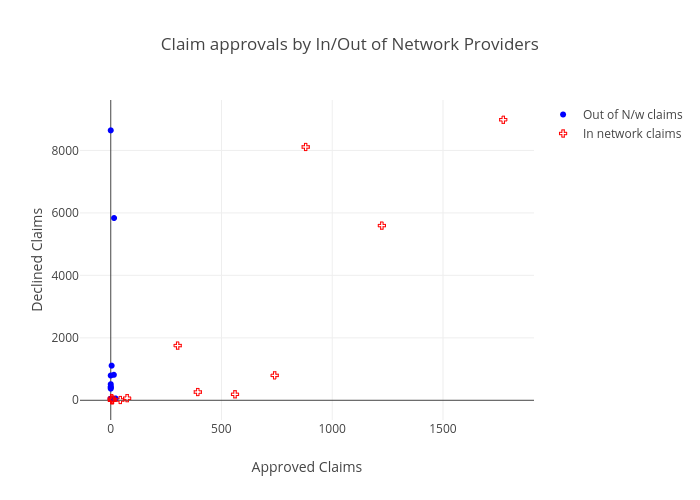

In [54]:
### This piece of code generates a plot to evaluate approvals by Provider and In/Out network indicator
dfProviderClaims = dfProviderClaims[dfProviderClaims.NumPaid > 0]
data = []

trace0 = go.Scatter(
                y = (list(dfOutNetWorkCounts.NumNonPaid)),
                x = (list(dfOutNetWorkCounts.NumPaid)),
                mode = 'markers' ,
                marker =dict(symbol=0, color = "blue"),
                name ='Out of N/w claims' 
                )
    
trace1 = go.Scatter(
                y = (list(dfInNetWorkCounts.NumNonPaid)),
                x = (list(dfInNetWorkCounts.NumPaid)),
                mode = 'markers' ,
                marker = dict(symbol=103, color = "red") ,
                name ='In network claims'
                )
    

    
data = [trace0 ,trace1]


layout = dict(title = 'Claim approvals by In/Out of Network Providers', 
              xaxis=dict(title='Approved Claims') , yaxis = dict(title="Declined Claims") )

fig = dict(data=data, layout=layout)


py.image.save_as(fig, filename='plots/paid per out of nw provider.png')

Image('plots/paid per out of nw provider.png')


##### Observation : From the graph we observe the following :
    - The number of approved claims are just a fraction of the rejected claims
    - Almost all of the claims submitted as Out of Network are rejected
    - Most of the approved claims are approved for In Network providers. 

##### Question 3
3. Consider all claim lines with a J-code.

     A. What percentage of J-code claim lines were non-paid?
     
     B. Create a model to predict when a J-code has a zero payment. Explain why you choose the modeling approach.
     
     C. How accurrate is your model at predicting zero payment claims?
     
     D. What data attributes are predominately influencing the non-paid rate?

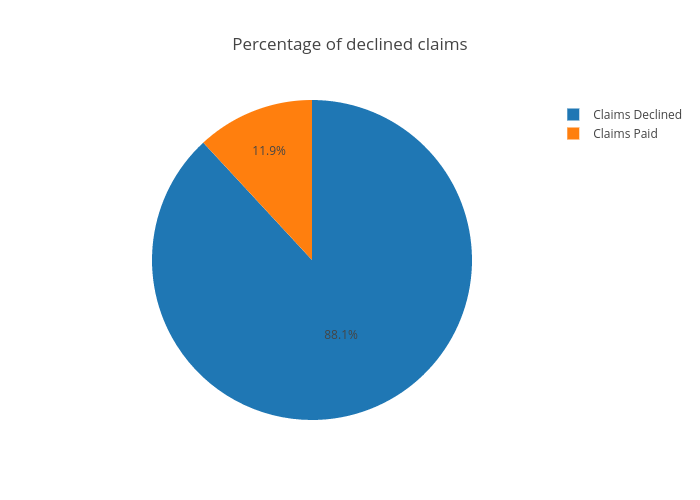

In [55]:
TotalPaid = dfJCodes.groupby(dfJCodes.PaymentDeclined).count()['Claim.Line.Number'][0]
TotalDeclined = dfJCodes.groupby(dfJCodes.PaymentDeclined).count()['Claim.Line.Number'][1]

labels = ['Claims Paid', 'Claims Declined']
values = [TotalPaid,TotalDeclined]

trace = go.Pie(labels=labels, values=values)

data = [trace]
layout = dict(title = 'Percentage of declined claims')
fig = dict(data=data, layout=layout)

# Plot and embed in ipython notebook!
py.image.save_as(fig, filename='plots/pie-chart-decline counts.png')

from IPython.display import Image
Image('plots/pie-chart-decline counts.png')


###### Around 88.1% of the J-Code claims were unpaid

### Statistical Modeling to predict zero payment 


As a first step in prediction , we analyze the features and their prior probabilities w.r.t a declined claim.

<table style="width:100%">
  <tr>
    <center> Analysis of prior probabilities across various features </center>
  </tr>
  <tr>
        <td><img src="plots/pie-chart-decline counts.png"  style="width:400px;height:300px;"></td> 
        <td><img src="plots/pie-chart-decline counts CapitationIndex.png" style="width:400px;height:300px;" >
        </td>

        <td><img src="plots/pie-chart-decline counts ClaimPrePrinceIndex.png"  style="width:400px;height:300px;"></td>
  </tr>

  <tr>
    <td><img src="plots/pie-chart-decline counts ClaimSubscriberType.png" style="width:400px;height:300px;" >
    </td>
    <td><img src="plots/pie-chart-decline counts ClaimType.png"  style="width:400px;height:300px;"></td> 
    <td><img src="plots/pie-chart-decline counts GroupIndex.png"  style="width:400px;height:300px;"></td>
  </tr>

  <tr>
    <td><img src="plots/pie-chart-decline counts InOutOfNetwork.png" style="width:400px;height:300px;" >
    </td>
    <td><img src="plots/pie-chart-decline counts LineOfBusinessID.png"  style="width:400px;height:300px;"></td> 
    <td><img src="plots/pie-chart-decline counts PlaceOfServiceCode.png"  style="width:400px;height:300px;"></td>
  </tr>


  <tr>
    <td><img src="plots/pie-chart-decline counts PriceIndex.png" style="width:400px;height:300px;" >
    </td>
    <td><img src="plots/pie-chart-decline counts PricingIndex.png"  style="width:400px;height:300px;"></td> 
    <td><img src="plots/pie-chart-decline counts ProcedureCode.png"  style="width:400px;height:300px;"></td>
  </tr>
  
  <tr>
    <td><img src="plots/pie-chart-decline counts ProviderID.png" style="width:400px;height:300px;" >
    </td>
    <td><img src="plots/pie-chart-decline counts ReferenceIndex.png"  style="width:400px;height:300px;"></td> 
    <td><img src="plots/pie-chart-decline counts RevenueCode.png"  style="width:400px;height:300px;"></td>
  </tr>
  
    <tr>
    <td><img src="plots/pie-chart-decline counts ServiceCode.png" style="width:400px;height:300px;" >
    </td>
    <td><img src="plots/pie-chart-decline counts SubgroupIndex.png"  style="width:400px;height:300px;"></td> 
    <td><img src="plots/pie-chart-decline counts.png"  style="width:400px;height:300px;"></td>
  </tr>
  

  
</table>

Based on the above plots of the prior probabilities, we see features such as Capitation.Index, Claim.Pre.Prince.Index, Group.Index , In.Out.Network
Procedure.Code and Provider ID as potential factors influencing the claim . 
Based on the above plots and our general understanding of the data set and the domain , we will use the following features to build predition models

<b>Independent Variables : </b>

['Provider.ID','Line.Of.Business.ID' ,'Revenue.Code' ,'Service.Code' ,'Place.Of.Service.Code' ,'Procedure.Code','Diagnosis.Code' , 'Price.Index' ,'In.Out.Of.Network' ,'Reference.Index' ,'Pricing.Index' ,'Capitation.Index' ,'Group.Index' , 'Subscriber.Index' ,'Subgroup.Index' ,'Claim.Type' ,'Claim.Subscriber.Type' ,'Claim.Pre.Prince.Index' ]

<b>Target Variable : </b>

We will use our derived feature 'PaymentDeclined' as the target variable . We have eliminated the quantitative variables such as Provider Claim Amount , Subcriber Payment Amount in lieu of the feature 'PaymentDeclined' for this analysis 

In [348]:
listFeatures = ['Provider.ID','Line.Of.Business.ID' ,'Revenue.Code' ,'Service.Code' ,'Place.Of.Service.Code' ,'Procedure.Code','Diagnosis.Code' , 
 'Price.Index' ,'In.Out.Of.Network' ,'Reference.Index' ,'Pricing.Index' ,'Capitation.Index' ,'Group.Index' , 
 'Subscriber.Index' ,'Subgroup.Index' ,'Claim.Type' ,'Claim.Subscriber.Type' ,'Claim.Pre.Prince.Index' ,'PaymentDeclined']


## Modeling Techniques
The problem of predicting ZERO payments is a classification problem. We will hence run Classification techniques (specifically Logistical Regression) for the predictions.

Choice of algorithms 
Write about Random Forest 
Naive Bayes 
Nueral Network

In [349]:
XData = dfJCodes[listFeatures]

#### One Hot Encoding  
Considering all the features are categorical , we will hot encode the features to get meaningful features. 

In [350]:
for colName in listFeatures :
    print "Number of Unique Values for Feature %s  : %d " %( colName , len(XData[colName].unique()))

Number of Unique Values for Feature Provider.ID  : 15 
Number of Unique Values for Feature Line.Of.Business.ID  : 6 
Number of Unique Values for Feature Revenue.Code  : 18 
Number of Unique Values for Feature Service.Code  : 12 
Number of Unique Values for Feature Place.Of.Service.Code  : 2 
Number of Unique Values for Feature Procedure.Code  : 202 
Number of Unique Values for Feature Diagnosis.Code  : 1438 
Number of Unique Values for Feature Price.Index  : 3 
Number of Unique Values for Feature In.Out.Of.Network  : 2 
Number of Unique Values for Feature Reference.Index  : 4 
Number of Unique Values for Feature Pricing.Index  : 4 
Number of Unique Values for Feature Capitation.Index  : 3 
Number of Unique Values for Feature Group.Index  : 781 
Number of Unique Values for Feature Subscriber.Index  : 6243 
Number of Unique Values for Feature Subgroup.Index  : 790 
Number of Unique Values for Feature Claim.Type  : 2 
Number of Unique Values for Feature Claim.Subscriber.Type  : 2 
Number 

###### After evaluating the unique features above , we will eliminate the features Group.Index , Subscriber.Index and Subgroup.Index for the initial modeling

In [351]:
if 'Group.Index' in listFeatures:
    listFeatures.remove('Group.Index')
if 'Subscriber.Index' in listFeatures :
    listFeatures.remove('Subscriber.Index')
if 'Subgroup.Index' in listFeatures :
    listFeatures.remove('Subgroup.Index')
print "List of features to be encoded : \n%s" % listFeatures

List of features to be encoded : 
['Provider.ID', 'Line.Of.Business.ID', 'Revenue.Code', 'Service.Code', 'Place.Of.Service.Code', 'Procedure.Code', 'Diagnosis.Code', 'Price.Index', 'In.Out.Of.Network', 'Reference.Index', 'Pricing.Index', 'Capitation.Index', 'Claim.Type', 'Claim.Subscriber.Type', 'Claim.Pre.Prince.Index', 'PaymentDeclined']


In [352]:
## Generate One Hot encoded dataframe
XData = XData[listFeatures]

## Remove PaymentDeclined from being Hot Encoded
if 'PaymentDeclined' in listFeatures :
    listFeatures.remove('PaymentDeclined')
    
# Generate hot encoding on categorical features
XData = pd.get_dummies(XData,columns=listFeatures)

print "Shape of DataFrame after Hot Encoding : %s " % str(XData.shape)

Shape of DataFrame after Hot Encoding : (51029, 1717) 


In [353]:
### Shuffle data set and generate train and test set 
from sklearn.utils import shuffle
XData = shuffle(XData)

YData = XData.PaymentDeclined
if 'PaymentDeclined' in XData.columns:
    del XData['PaymentDeclined']
    
## Generate Cross Validation Data

from sklearn.cross_validation import train_test_split

xTrain , xTest , yTrain , yTest = train_test_split(XData,YData)

In [355]:
print xTrain.shape
print xTest.shape
print yTrain.shape
print yTest.shape

(38271, 1716)
(12758, 1716)
(38271,)
(12758,)


In [185]:
from sklearn.metrics import accuracy_score ,confusion_matrix ,roc_auc_score

#### Generate baseline models using   GaussianNB , BernoulliNB and RandomForestClassifier 

In [139]:
import importlib
dictResults = {}

def evaluateAndPrintResults(strModule,strClass) :
    
    print "Evaluating "+strClass+" for 5 iterations"
    rocScore = 0
    for i in range(0,5):
        xTrain , xTest , yTrain , yTest = train_test_split(XData,YData)
        genericClass = getattr(importlib.import_module(strModule), strClass)
        model = genericClass()
        model.fit(xTrain,yTrain)

        yPred = model.predict(xTest)
        tempScore = roc_auc_score(yPred,yTest)
        rocScore +=tempScore
        dictResults[strClass].append(tempScore)


    print "%s : Avg AUC on validation set  : %.4f" % ( strClass , rocScore/5)

dictResults['GaussianNB'] =[]
dictResults['BernoulliNB'] =[]
dictResults['RandomForestClassifier'] =[]

evaluateAndPrintResults( "sklearn.naive_bayes",'GaussianNB')
evaluateAndPrintResults( "sklearn.naive_bayes",'BernoulliNB')
evaluateAndPrintResults( "sklearn.ensemble",'RandomForestClassifier')

Evaluating GaussianNB for 5 iterations
GaussianNB : Avg AUC on validation set  : 0.6281
Evaluating BernoulliNB for 5 iterations
BernoulliNB : Avg AUC on validation set  : 0.6534
Evaluating RandomForestClassifier for 5 iterations
RandomForestClassifier : Avg AUC on validation set  : 0.8757


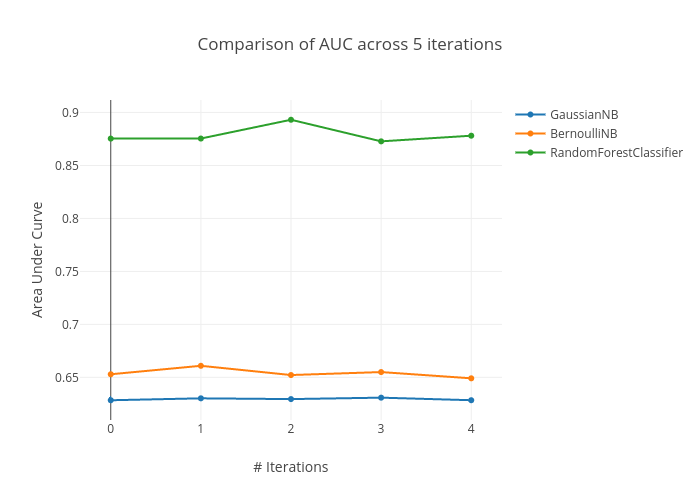

In [65]:
data = []

trace0 = go.Scatter(
                y = dictResults["GaussianNB"],
                x = range(0,5),
                mode = 'lines+markers' ,
                name ='GaussianNB'
                )
trace1 = go.Scatter(
                y = dictResults["BernoulliNB"],
                x = range(0,5),
                mode = 'lines+markers' ,
                name ='BernoulliNB'
                )
trace2 = go.Scatter(
                y = dictResults["RandomForestClassifier"],
                x = range(0,5),
                mode = 'lines+markers' ,
                name ='RandomForestClassifier'
                )
    

    
data = [trace0,trace1,trace2]


layout = dict(title = 'Comparison of AUC across 5 iterations',xaxis = dict(title="# Iterations"),yaxis = dict(title="Area Under Curve"))

fig = dict(data=data, layout=layout)

# Plot and embed in ipython notebook!
py.image.save_as(fig, filename='plots/roc-comparison-scatter - 3 models.png')

Image('plots/roc-comparison-scatter - 3 models.png')

###### Observation : We see that the RandomForest method consistently yields the best perforamce across the 3 evaluated  models


### Hyperparameter Tuning and Grid Search on RandomForestClassifier

In [186]:
dfConsilidateResults = pd.DataFrame()
xTrain , xTest , yTrain , yTest = train_test_split(XData,YData)

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV


/Users/raghuramsrinivas/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.



In [187]:
rndModel = RandomForestClassifier()
rndModel.fit(xTrain,yTrain)
yPred = rndModel.predict(xTest)
print roc_auc_score(yPred,yTest)

0.880325432428


In [189]:
## Save Results 
dfConsilidateResults['yTest_RndFrst_Baseline'] = yTest
dfConsilidateResults['yPred_RndFrst_Baseline'] = yPred

dfConsilidateResults['yPredProb_RndFrst_Baseline'] = (rndModel.predict_proba(xTest)[:,1])


###### Search for the best model by evaluating various hyperparameters using GridSearch on RandomForestClassifier

In [73]:
parameters = {'criterion':['entropy', 'gini'],'n_estimators' : [10,20,30]}

rndGrid = GridSearchCV(rndModel, parameters , cv=3 ,verbose=3)
rndGrid.fit(XData,YData)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] n_estimators=10, criterion=entropy ..............................
[CV] ..... n_estimators=10, criterion=entropy, score=0.946561 -   3.0s
[CV] n_estimators=10, criterion=entropy ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV] ..... n_estimators=10, criterion=entropy, score=0.945326 -   2.9s
[CV] n_estimators=10, criterion=entropy ..............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.9s remaining:    0.0s


[CV] ..... n_estimators=10, criterion=entropy, score=0.944441 -   2.9s
[CV] n_estimators=20, criterion=entropy ..............................
[CV] ..... n_estimators=20, criterion=entropy, score=0.947384 -   5.5s
[CV] n_estimators=20, criterion=entropy ..............................
[CV] ..... n_estimators=20, criterion=entropy, score=0.946208 -   5.3s
[CV] n_estimators=20, criterion=entropy ..............................
[CV] ..... n_estimators=20, criterion=entropy, score=0.947146 -   5.4s
[CV] n_estimators=30, criterion=entropy ..............................
[CV] ..... n_estimators=30, criterion=entropy, score=0.948677 -   7.8s
[CV] n_estimators=30, criterion=entropy ..............................
[CV] ..... n_estimators=30, criterion=entropy, score=0.946678 -   7.7s
[CV] n_estimators=30, criterion=entropy ..............................
[CV] ..... n_estimators=30, criterion=entropy, score=0.946852 -   8.0s
[CV] n_estimators=10, criterion=gini .................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.6min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 30], 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [74]:
rndGrid.best_params_

{'criterion': 'gini', 'n_estimators': 30}

In [191]:
rndModel_BestEst = RandomForestClassifier(criterion='gini',n_estimators=30)
rndModel_BestEst.fit(xTrain,yTrain)
yPred = rndModel_BestEst.predict(xTest)
print roc_auc_score(yPred,yTest)

0.889241317894


In [192]:
dfConsilidateResults["yTest_RndFrst_GrdSrch"] =yTest
dfConsilidateResults["yPred_RndFrst_GrdSrch"] =yPred
dfConsilidateResults['yPredProb_RndFrst_GrdSrch'] = (rndModel_BestEst.predict_proba(xTest)[:,1])


#### The Grid Search yielded the following parameters for the best performance

{'criterion': 'gini', 'n_estimators': 30}

In [82]:
from sklearn.metrics import confusion_matrix ,precision_score ,recall_score

### Downsampling for handling Imbalanced classes

The data set is skewed interms of the # classes with PaymentDeclined =1 as opposed to PaymentDeclined = 0 . We will downsample the dataset and re-run RandomForestClassifier to check if the algorithm is not overfit. 

In [229]:
XData = XData.join(YData)

In [230]:
XData_DeclinedClaims = XData[XData["PaymentDeclined"]==1]
print XData_DeclinedClaims.shape

(44961, 1717)


In [231]:
XData_ApprovedClaims = XData[XData["PaymentDeclined"]==0]
print XData_ApprovedClaims.shape

(6068, 1717)


In [232]:
### We will downsample Declined claims to contain about 7k rows and fit a model to evaluate accuracy
XData_DeclinedClaims = XData_DeclinedClaims.sample(n=7000)
XData = XData_ApprovedClaims.append(XData_DeclinedClaims)

YData = XData.PaymentDeclined
if 'PaymentDeclined' in XData.columns :
    del XData['PaymentDeclined']

xTrain,xTest,yTrain,yTest = train_test_split(XData,YData)
rndModel_BestEst.fit(xTrain,yTrain)
yPred = rndModel_BestEst.predict(xTest)

print "Accuracy score on Random Forest with downsampling downsampling %.4f" % roc_auc_score(yPred,yTest)

Accuracy score on Random Forest with downsampling downsampling 0.9179


In [ ]:
dfJCodes.to_csv("data/JCodes.csv")

In [236]:
yPred_downsample = yPred
yTest_downsample = yTest.as_matrix()
yPredProb_downsample= rndModel_BestEst.predict_proba(xTest)[:,1]


array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
### Text Embedding 

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [92]:
dfTextSource = pd.read_csv("data/Data_StringEmbedding.csv")

In [200]:
XData = dfTextSource.StringRepresentation
YData = dfTextSource.PaymentDeclined


cnt_vectorizer =TfidfVectorizer()

xTrain_Embedding , xTest_Embedding ,yTrain ,yTest = train_test_split(xData_Embedding.toarray(),YData)



rndFrst_TextEmbed = RandomForestClassifier(criterion='gini',n_estimators=30)
rndFrst_TextEmbed.fit(xTrain_Embedding,yTrain)

#xTest_Embedding = cnt_vectorizer.transform(xTest_Text)
yPred = rndFrst_TextEmbed.predict(xTest_Embedding)
roc_auc_score(yPred,yTest)

0.85661278424421861

In [211]:
yTest_EmbeddingVector_Tfidf = yTest
dfConsilidateResults["yPred_EmbeddingVector_Tfidf"] = yPred
dfConsilidateResults['yPredProb_EmbeddingVector_Tfidf'] = (rndFrst_TextEmbed.predict_proba(xTest_Embedding)[:,1])


In [120]:
from sklearn.metrics import roc_curve

In [250]:
lw = 2

fpr, tpr, thresholds = roc_curve(dfConsilidateResults.yTest_RndFrst_Baseline.as_matrix(), 
                                 dfConsilidateResults.yPredProb_RndFrst_Baseline.as_matrix(),pos_label=1)

roc_score = roc_auc_score(dfConsilidateResults.yTest_RndFrst_Baseline, 
                          dfConsilidateResults.yPred_RndFrst_Baseline)

trace1 = go.Scatter(x=fpr, y=tpr, 
                    mode='lines', 
                    line=dict(color='black', width=lw),
                    name='RndFrst Baseline<br>(ROC = %0.2f)' % roc_score
                   )

trace0 = go.Scatter(x=[0, 1], y=[0, 1], 
                    mode='lines', 
                    line=dict(color='navy', width=lw, dash='dash'),
                    showlegend=False)


fpr, tpr, thresholds = roc_curve(dfConsilidateResults.yTest_RndFrst_GrdSrch.as_matrix(), 
                                 dfConsilidateResults.yPredProb_RndFrst_GrdSrch.as_matrix(),pos_label=1)

roc_score = roc_auc_score(dfConsilidateResults.yTest_RndFrst_GrdSrch, 
                          dfConsilidateResults.yPred_RndFrst_GrdSrch)

trace2 = go.Scatter(x=fpr, y=tpr, 
                    mode='lines', 
                    line=dict(color='darkorange', width=lw),
                    name='RndFrst (30,gini)<br>(ROC = %0.2f)' % roc_score
                   )

fpr, tpr, thresholds = roc_curve(yTest_EmbeddingVector_Tfidf, 
                                 dfConsilidateResults.yPredProb_EmbeddingVector_Tfidf.as_matrix(),pos_label=1)

roc_score = roc_auc_score(yTest_EmbeddingVector_Tfidf, 
                          dfConsilidateResults.yPred_EmbeddingVector_Tfidf)

trace3 = go.Scatter(x=fpr, y=tpr, 
                    mode='lines', 
                    line=dict(color='red', width=lw),
                    name='RndFrst Tfidf Embed <br>(ROC = %0.2f)' % roc_score
                   )


fpr, tpr, thresholds = roc_curve(yPredProb_downsample, 
                                 yTest_downsample ,pos_label=1)

roc_score = roc_auc_score(yPred_downsample, 
                          yTest_downsample)

trace4 = go.Scatter(x=fpr, y=tpr, 
                    mode='lines', 
                    line=dict(color='green', width=lw),
                    name='RndFrstc on downsample <br>(ROC = %0.2f)' % roc_score
                   )


layout = go.Layout(title='Receiver operating characteristic',
                   xaxis=dict(title='False Positive Rate'),
                   yaxis=dict(title='True Positive Rate'))

fig = go.Figure(data=[trace0 , trace1, trace2 ,trace3 , trace4], layout=layout)


py.iplot(fig)

##### Observation : Based on the above ROCs , we see that the Random Forest Method (30 trees and gini index as feature selection) performs sllightly better than the other models. 

We will hence choose this model as the best model for our predictions

### Threshold selection and Model Precision

In [256]:
dfBestModel = dfConsilidateResults[["yTest_RndFrst_GrdSrch","yPred_RndFrst_GrdSrch","yPredProb_RndFrst_GrdSrch"]]

In [263]:
dfTruePos = dfBestModel[(dfBestModel.yTest_RndFrst_GrdSrch == 1) & (dfBestModel.yPred_RndFrst_GrdSrch == 1) ]
dfTrueNeg = dfBestModel[(dfBestModel.yTest_RndFrst_GrdSrch == 0) & (dfBestModel.yPred_RndFrst_GrdSrch == 0) ]
dfFalsePos = dfBestModel[(dfBestModel.yTest_RndFrst_GrdSrch == 0) & (dfBestModel.yPred_RndFrst_GrdSrch == 1) ]
dfFalseNeg = dfBestModel[(dfBestModel.yTest_RndFrst_GrdSrch == 1) & (dfBestModel.yPred_RndFrst_GrdSrch == 0) ]


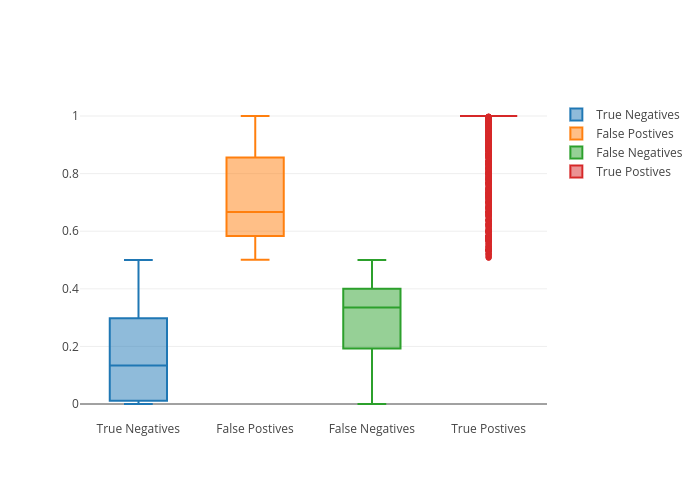

In [299]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np


trace0 = go.Box(
    y=dfTruePos.yPredProb_RndFrst_GrdSrch ,
    name ="True Postives"
)

trace1 = go.Box(
    y=dfTrueNeg.yPredProb_RndFrst_GrdSrch ,
    name ="True Negatives"
)

trace2 = go.Box(
    y=dfFalsePos.yPredProb_RndFrst_GrdSrch ,
    name ="False Postives"
)
trace3 = go.Box(
    y=dfFalseNeg.yPredProb_RndFrst_GrdSrch ,
    name ="False Negatives"
)



data = [ trace1, trace2 ,trace3  , trace0]
py.image.save_as(data,"plots/Analysis of confusion matrix.png")

Image("plots/Analysis of confusion matrix.png")

#### Observation : As is evident by the above graph , the model predicts the True positives with very high confidence .  Setting a threshold value  = .8 results in a model precision score of 96%

#### Top attributes are predominately influencing the non-paid rate

In [303]:
topFeatures = rndModel_BestEst.feature_importances_
ind = np.argpartition(topFeatures, -10)[-10:]

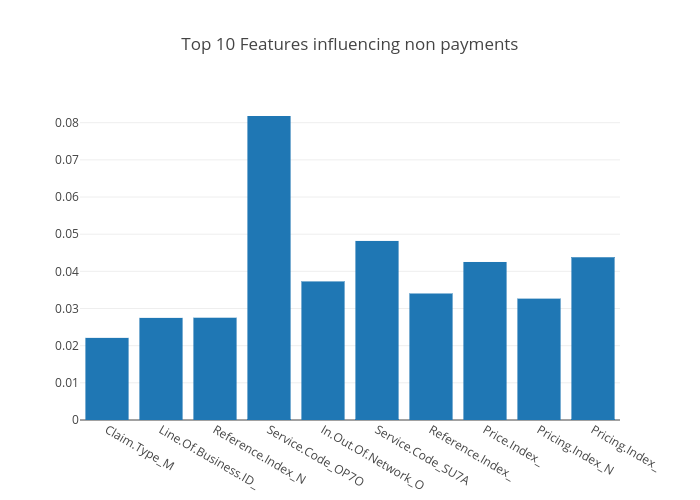

In [306]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
            x=XData.columns[ind],
            y=topFeatures[ind]
    )]

layout = go.Layout(
    barmode='group' ,title = 'Top 10 Features influencing non payments '
)

fig = go.Figure(data=data, layout=layout)
py.image.save_as(fig, filename='plots/top 10 features.png')
Image("plots/top 10 features.png")

In [380]:
from sklearn.preprocessing import binarize


In [395]:
ipthreshold = .05
listPrecisionScore = []
listFalsePositives = []
listThresholds = []
while ipthreshold < 1 :
    yPredProbs = rndModel_BestEst.predict_proba(xTest)
    yTest  = dfConsilidateResults.yTest_RndFrst_GrdSrch.as_matrix()
    binarize(yPredProbs,threshold=ipthreshold,copy=False)
 

    listPrecisionScore.append(np.around(precision_score(yTest,yPredProbs[:,1]),decimals=2))
    listFalsePositives.append(confusion_matrix(yTest,yPredProbs[:,1])[0,1])
    listThresholds.append(ipthreshold)
    ipthreshold+=.05


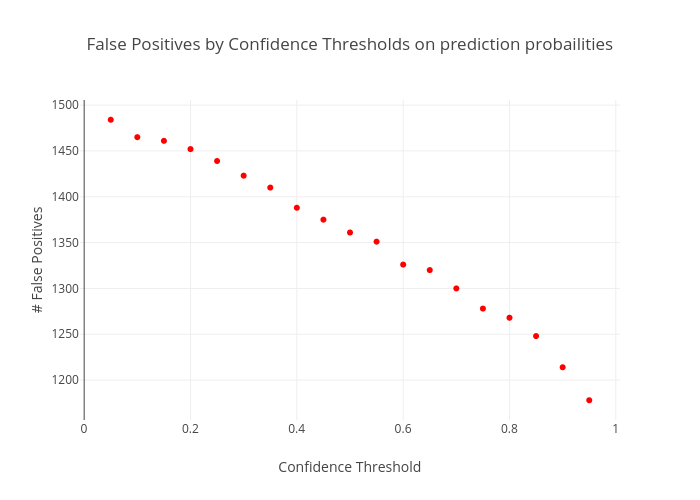

In [389]:
trace1 = go.Scatter(
    x=listThresholds, y=(listFalsePositives) ,mode='markers', 
    line=dict(color='red', width=lw),
    name='yaxis data'
)

trace2 = go.Scatter(
    x=listThresholds, y=(listPrecisionScore) ,mode='markers', 
    line=dict(color='green', width=lw),
    name='yaxis data'
)

data = [trace1]
layout = go.Layout(
    title='False Positives by Confidence Thresholds on prediction probailities',
    yaxis=dict(
        title='# False Positives'
    ) ,
    xaxis=dict(
        title='Confidence Threshold'
    )
)
fig = go.Figure(data=data, layout=layout)
py.image.save_as(fig,filename="plots/fp counts by threshold.png")
Image("plots/fp counts by threshold.png")

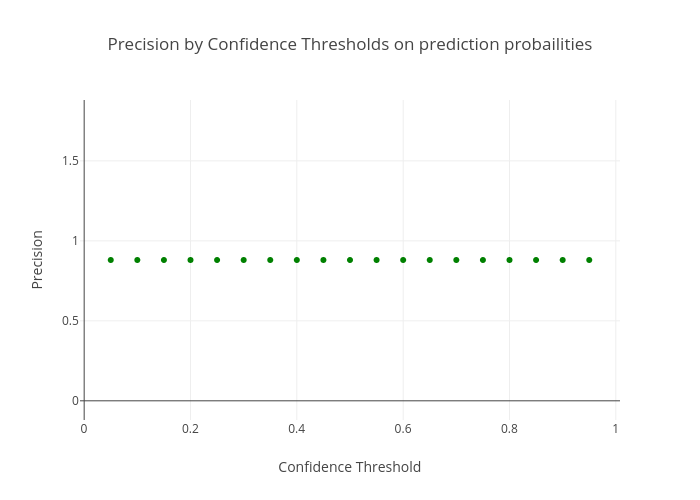

In [396]:

trace2 = go.Scatter(
    x=listThresholds, y=(listPrecisionScore) ,mode='markers', 
    line=dict(color='green', width=lw),
    name='yaxis data'
)

data = [trace2]
layout = go.Layout(
    title='Precision by Confidence Thresholds on prediction probailities',
    yaxis=dict(
        title='Precision'
    ) ,
    xaxis=dict(
        title='Confidence Threshold'
    )
)
fig = go.Figure(data=data, layout=layout)
py.image.save_as(fig,filename="plots/precision counts by threshold.png")
Image("plots/precision counts by threshold.png")